# SuperSet

In this notebook we aim to discover a way to represnet all of our finger prints

## Method 1:

aim is to clean up the data and add 2 new columns such as **Drug_name** and **bond_type** then i will input them in a 1D CNN and use XAI techniques to see why a model has made a specific prediction.


first we are going to clean up and change the format of the data

we are going to have the following:
* Residues 
* Interactions
* Frames


In [2]:
import pandas as pd
import os

# Define input config for each drug
drug_files = {
    "AMP": {
        "path": "Data/New/fp_comp_dataframe_AMP.csv",
        "drug_name": "AMP",
        "bond_type": "inward"
    },

    "BZT": {
        "path": "Data/New/fp_comp_dataframe_BZT.csv",
        "drug_name": "BZT",
        "bond_type": "outward"
    },

    "COC": {
        "path": "Data/New/fp_comp_dataframe_COC.csv",
        "drug_name": "COC",
        "bond_type": "outward"
    },

    "DOP": {
        "path": "Data/New/fp_comp_dataframe_DOP.csv",
        "drug_name": "DOP",
        "bond_type": "occluded"

    },
    "MAPB":{
        "path": "Data/New/fp_comp_dataframe_MAPB.csv",
        "drug_name": "MAPB",
        "bond_type": "inward"
    },

    "MPH":{
        "path": "Data/New/fp_comp_dataframe_MPH.csv",
        "drug_name": "MPH",
        "bond_type": "outward"
    },

    "Z78":{
        "path": "Data/New/fp_comp_dataframe_Z78.csv",
        "drug_name": "Z78",
        "bond_type": "outward"
    },

    "MDMA":{
        "path": "Data/Original/fp_comp_dataframe_MDMA.csv",
        "drug_name": "MDMA",
        "bond_type": "inward"
    }
}

# Create output directory if it doesn't exist
os.makedirs("Data/New/processed", exist_ok=True)

# Processing loop
for drug, config in drug_files.items():
    # Load original CSV
    df = pd.read_csv(config["path"])

    # STEP 1: Drop the third row (index 2), which contains mostly NaN values
    df_cleaned = df.drop(index=2).reset_index(drop=True)

    # STEP 2: Extract header rows
    header_residues = df_cleaned.iloc[0]
    header_types = df_cleaned.iloc[1]

    # STEP 3: Create MultiIndex
    multi_index = pd.MultiIndex.from_arrays([header_residues, header_types])

    # STEP 4: Drop header rows
    df_cleaned = df_cleaned.drop(index=[0, 1]).reset_index(drop=True)

    # STEP 5: Apply MultiIndex
    df_cleaned.columns = multi_index

    # STEP 6: Insert correct frame column
    frame_col = df.iloc[3:, 0].reset_index(drop=True)
    df_cleaned.insert(0, ("meta", "frame"), frame_col.astype(int))

    # STEP 6.5: Drop redundant ("protein", "interaction") column if present
    if ("protein", "interaction") in df_cleaned.columns:
        df_cleaned = df_cleaned.drop(columns=[("protein", "interaction")])

    # STEP 7: Convert numerics
    df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')

    # STEP 8: Fill NaN with 0
    df_cleaned = df_cleaned.fillna(0)

    # STEP 9: Add meta columns
    df_cleaned[("meta", "bond_type")] = config["bond_type"]
    df_cleaned[("meta", "drug_name")] = config["drug_name"]

    # STEP 10: Reorder columns
    df_cleaned = df_cleaned[
        [col for col in df_cleaned.columns if col[0] != "meta" or col[1] == "frame"] +
        [("meta", "bond_type"), ("meta", "drug_name")]
    ]

    # Save cleaned version
    output_path = f"Data/New/processed/cleaned_{config['drug_name']}.csv"
    df_cleaned.to_csv(output_path, index=False)
    print(f"Saved cleaned CSV for {drug}: {output_path}")


C:\Users\Amir\AppData\Local\Temp\ipykernel_32300\1939609054.py:88: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')
C:\Users\Amir\AppData\Local\Temp\ipykernel_32300\1939609054.py:88: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')
C:\Users\Amir\AppData\Local\Temp\ipykernel_32300\1939609054.py:88: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')
C:\Users\Amir\AppData\Local\Temp\ipykernel_32300\1939609054.py:88: FutureWarning: errors='ignore' is deprecated and will rai

Saved cleaned CSV for AMP: Data/New/processed/cleaned_AMP.csv
Saved cleaned CSV for BZT: Data/New/processed/cleaned_BZT.csv
Saved cleaned CSV for COC: Data/New/processed/cleaned_COC.csv
Saved cleaned CSV for DOP: Data/New/processed/cleaned_DOP.csv
Saved cleaned CSV for MAPB: Data/New/processed/cleaned_MAPB.csv
Saved cleaned CSV for MPH: Data/New/processed/cleaned_MPH.csv
Saved cleaned CSV for Z78: Data/New/processed/cleaned_Z78.csv
Saved cleaned CSV for MDMA: Data/New/processed/cleaned_MDMA.csv


C:\Users\Amir\AppData\Local\Temp\ipykernel_32300\1939609054.py:88: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')
C:\Users\Amir\AppData\Local\Temp\ipykernel_32300\1939609054.py:88: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')
C:\Users\Amir\AppData\Local\Temp\ipykernel_32300\1939609054.py:88: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')
C:\Users\Amir\AppData\Local\Temp\ipykernel_32300\1939609054.py:88: FutureWarning: errors='ignore' is deprecated and will rai

### Numpy format 

loading the cleaned files, then extract:

* x = all numeric feature columns (residue fingerprints)
* y = bond_type label will be encoded such as 0= inward, 1= outward, 2= occluded

thnen converting them into NumPy arrays 
and stakcing them for model training.

**outcome:**

```
X shape: (1282, 46)
y shape: (1282,)
Classes: ['inward' 'outward']

```

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import os

# List of cleaned files to include
drug_files = ["AMP", "COC"]  # others can be added here

X_list = []
y_list = []

for drug in drug_files:
    # Load cleaned CSV
    df = pd.read_csv(f"Data/superset/approach_1/cleaned_{drug}.csv", header=[0, 1])

    # Extract feature matrix (drop all 'meta' columns)
    X = df.loc[:, df.columns.get_level_values(0) != "meta"]
    X = X.to_numpy(dtype=np.float32)

    # Extract and encode bond_type as target
    y = df[("meta", "bond_type")]
    y_list.append(y)

    # Append features
    X_list.append(X)

# Combine all drugs into a single dataset
X_all = np.vstack(X_list)

# Encode labels
le = LabelEncoder()
y_all = le.fit_transform(pd.concat(y_list).values)

# Shapes
print("X shape:", X_all.shape)
print("y shape:", y_all.shape)
print("Classes:", le.classes_)

# Save numpy arrays
output_dir = "Data/superset/approach_1/num"
os.makedirs(output_dir, exist_ok=True)

np.save(os.path.join(output_dir, "X_all.npy"), X_all)
np.save(os.path.join(output_dir, "y_all.npy"), y_all)
np.save(os.path.join(output_dir, "y_labels.npy"), le.classes_)

print(f"Saved NumPy arrays to: {output_dir}")


X shape: (1282, 46)
y shape: (1282,)
Classes: ['inward' 'outward']
Saved NumPy arrays to: Data/superset/approach_1/num


In [80]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# STEP 1: Load data
X = np.load("Data/superset/approach_1/num/X_all.npy")
y = np.load("Data/superset/approach_1/num/y_all.npy")
y_labels = np.load("Data/superset/approach_1/num/y_labels.npy", allow_pickle= True)

# STEP 2: Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# STEP 3: PyTorch Dataset
class FingerprintDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx].unsqueeze(0), self.y[idx]  # shape: (1, features)

train_dataset = FingerprintDataset(X_train, y_train)
test_dataset = FingerprintDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# STEP 4: 1D CNN model
class CNN1D(nn.Module):
    def __init__(self, input_length, num_classes):
        super(CNN1D, self).__init__()
        self.net = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveMaxPool1d(1),
            nn.Flatten(),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# Instantiate model
input_length = X.shape[1]
num_classes = len(np.unique(y))
model = CNN1D(input_length, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# STEP 5: Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(50):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/50 - Loss: {total_loss:.4f}")

# STEP 6: Evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(y_batch.numpy())

# Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=y_labels))


Epoch 1/50 - Loss: 22.0506
Epoch 2/50 - Loss: 20.4114
Epoch 3/50 - Loss: 18.8914
Epoch 4/50 - Loss: 15.7279
Epoch 5/50 - Loss: 12.1657
Epoch 6/50 - Loss: 8.4809
Epoch 7/50 - Loss: 5.9380
Epoch 8/50 - Loss: 4.2279
Epoch 9/50 - Loss: 2.9953
Epoch 10/50 - Loss: 2.2395
Epoch 11/50 - Loss: 1.7513
Epoch 12/50 - Loss: 1.3162
Epoch 13/50 - Loss: 1.0971
Epoch 14/50 - Loss: 0.9170
Epoch 15/50 - Loss: 0.7867
Epoch 16/50 - Loss: 0.6872
Epoch 17/50 - Loss: 0.6075
Epoch 18/50 - Loss: 0.5417
Epoch 19/50 - Loss: 0.4916
Epoch 20/50 - Loss: 0.4469
Epoch 21/50 - Loss: 0.4061
Epoch 22/50 - Loss: 0.3606
Epoch 23/50 - Loss: 0.3304
Epoch 24/50 - Loss: 0.3006
Epoch 25/50 - Loss: 0.2950
Epoch 26/50 - Loss: 0.2593
Epoch 27/50 - Loss: 0.2448
Epoch 28/50 - Loss: 0.2187
Epoch 29/50 - Loss: 0.2014
Epoch 30/50 - Loss: 0.1914
Epoch 31/50 - Loss: 0.1787
Epoch 32/50 - Loss: 0.1687
Epoch 33/50 - Loss: 0.1641
Epoch 34/50 - Loss: 0.1643
Epoch 35/50 - Loss: 0.1542
Epoch 36/50 - Loss: 0.1332
Epoch 37/50 - Loss: 0.1277
Epoch

In [81]:
# Directory to save model weights
import os
os.makedirs("Data/superset/approach_1/model", exist_ok=True)

# Save model weights (state_dict)
model_path = "Data/superset/approach_1/model/cnn1d_weights.pth"
torch.save(model.state_dict(), model_path)

print(f"Model weights saved to: {model_path}")


Model weights saved to: Data/superset/approach_1/model/cnn1d_weights.pth


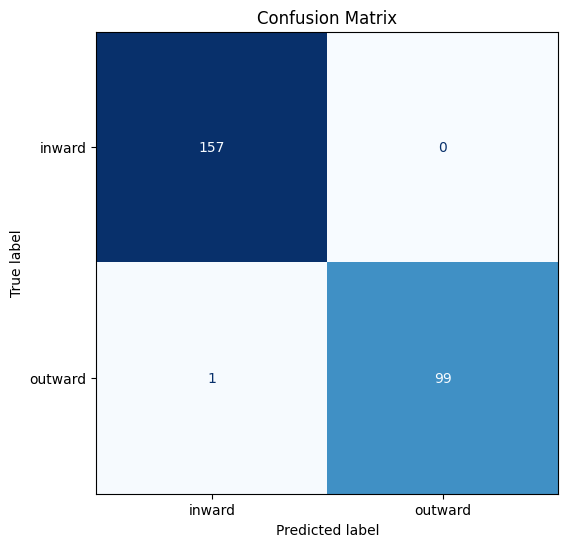

Classification Report:
              precision    recall  f1-score   support

      inward       0.99      1.00      1.00       157
     outward       1.00      0.99      0.99       100

    accuracy                           1.00       257
   macro avg       1.00      0.99      1.00       257
weighted avg       1.00      1.00      1.00       257



In [83]:
#Model Diagnostic 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# STEP 1: Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_labels)

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix")
plt.show()

# STEP 2: Classification Report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=y_labels))


### Making predictions!

now the aim is to load and clean a new data that the model hasn't seen before, then use the the saved model weights to make predictions. the dtug that i will be using is **MDMA** 

In [84]:
# Load cleaned MDMA CSV
df = pd.read_csv("Data/superset/approach_1/cleaned_MDMA.csv", header=[0, 1])
X_mdma = df.loc[:, df.columns.get_level_values(0) != "meta"].to_numpy(dtype=np.float32)
X_mdma_tensor = torch.tensor(X_mdma).unsqueeze(1)  # shape: (n_samples, 1, features)

# Load model and weights
model = CNN1D(input_length=X_mdma.shape[1], num_classes=2) # need to chaneg to 3 if we have Occluded
model.load_state_dict(torch.load("Data/superset/approach_1/model/cnn1d_weights.pth"))
model.eval()

# Predict
with torch.no_grad():
    outputs = model(X_mdma_tensor)
    preds = torch.argmax(outputs, dim=1)


In [85]:
# Count predictions per class
import numpy as np
unique, counts = np.unique(preds.numpy(), return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {cls} → {count} frames predicted")


Class 0 → 578 frames predicted
Class 1 → 163 frames predicted


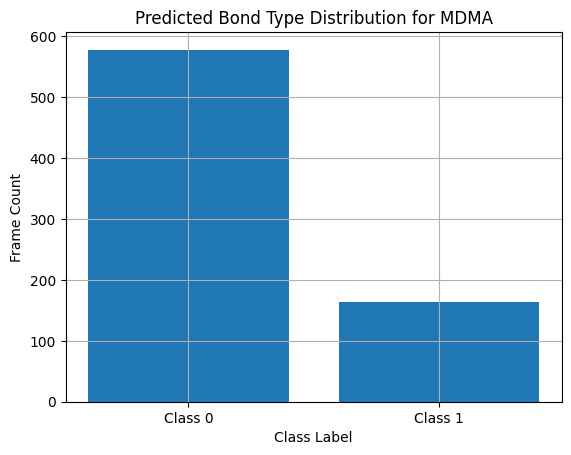

In [86]:
import matplotlib.pyplot as plt

# Convert to counts
plt.bar(unique, counts, tick_label=[f"Class {i}" for i in unique])
plt.title("Predicted Bond Type Distribution for MDMA")
plt.xlabel("Class Label")
plt.ylabel("Frame Count")
plt.grid(True)
plt.show()


In [87]:
label_names = ['inward', 'outward']  # order must match training label encoding
for cls, count in zip(unique, counts):
    print(f"{label_names[cls]}: {count} frames")


inward: 578 frames
outward: 163 frames


### Why model predicted inward and outward?

now it's time to use XAI techniques such as Lime and Shap to undrestand models predictions

* LIME: re-assesses the models input features and checks model response to identify most influential residues
* SHAP: computes score of each attribution per prediction

In [78]:
from lime import lime_tabular
import pandas as pd
import torch
import numpy as np

# Load cleaned AMP (training reference) CSV to get consistent feature names
df_train = pd.read_csv("Data/superset/approach_1/cleaned_AMP.csv", header=[0, 1])
real_feature_names = [f"{a} ({b})" for a, b in df_train.columns if a != "meta"]

# Check shape to avoid IndexError
assert X_all.shape[1] == len(real_feature_names), "Feature count mismatch in X_all"
assert X_mdma.shape[1] == len(real_feature_names), "Feature count mismatch in X_mdma"

# LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_all,
    feature_names=real_feature_names,
    class_names=['inward', 'outward'],  # Only these two were trained
    discretize_continuous=True
)

# Wrapper for prediction
def predict_proba_fn(x):
    x_tensor = torch.tensor(x).unsqueeze(1).float()  # (batch, 1, features)
    with torch.no_grad():
        logits = model(x_tensor)
        probs = torch.softmax(logits, dim=1)
    return probs.cpu().numpy()


AssertionError: Feature count mismatch in X_mdma

In [77]:
# Choose an index from MDMA
i = 42
explanation = explainer.explain_instance(X_mdma[i].ravel(), predict_proba_fn)
explanation.show_in_notebook()

IndexError: index 44 is out of bounds for axis 0 with size 44

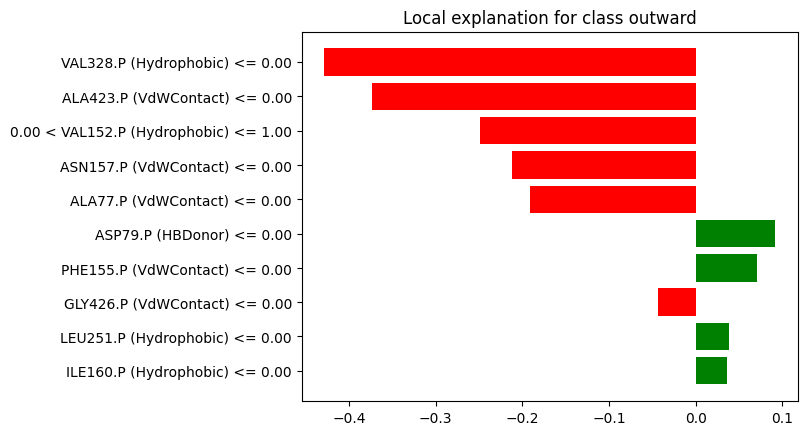

In [73]:
fig = explanation.as_pyplot_figure()
fig.patch.set_facecolor('white')  
plt.show()


### SHAP

In [79]:
import shap
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned training CSV to get correct feature names
df_train = pd.read_csv("Data/superset/approach_1/cleaned_AMP.csv", header=[0, 1])
real_feature_names = [f"{a} ({b})" for a, b in df_train.columns if a != "meta"]

# Prepare background from training data
background = torch.tensor(X_all[:200]).unsqueeze(1).float()  # (100, 1, features)

# Prepare MDMA sample(s) to explain
mdma_tensor = torch.tensor(X_mdma).unsqueeze(1).float()  # (n_samples, 1, features)

# Ensure model is in eval mode
model.eval()

# Create SHAP DeepExplainer with PyTorch model
explainer = shap.DeepExplainer(model, background)

# Pick a frame index from MDMA to explain
i = 42  # or any frame index
shap_values = explainer.shap_values(mdma_tensor[i:i+1], check_additivity=False)

# Get predicted class index
pred_class = torch.argmax(model(mdma_tensor[i:i+1])).item()

# Flatten SHAP values if needed (e.g. shape is (44, 2))
shap_vector = shap_values[pred_class][0]
if shap_vector.ndim == 2 and shap_vector.shape[1] == 2:
    shap_vector = shap_vector.sum(axis=1)

# Create a SHAP Explanation object
explanation_obj = shap.Explanation(
    values=shap_vector,
    base_values=explainer.expected_value[pred_class],
    data=X_mdma[i],
    feature_names=real_feature_names
)

# Modern SHAP plot (clean, readable)
shap.plots.waterfall(explanation_obj)


RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 44 but got size 46 for tensor number 1 in the list.

## Method 2: Transfer learning!

we will be using a **ResNet1D**, why? 

* proven performance on sequential fingerprint like data
* compatible with SHAP and LIME
* can be easily pre-trained or extended

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Set paths
input_dir = "Data/New/processed"
output_dir = "models/transfer"
os.makedirs(output_dir, exist_ok=True)

# Step 1: Get full feature column set
all_columns = set()
meta_cols = [("meta", "frame"), ("meta", "bond_type"), ("meta", "drug_name")]

for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(input_dir, file), header=[0, 1])
        feature_cols = [col for col in df.columns if col[0] != "meta"]
        all_columns.update(feature_cols)

# Sort and freeze final feature order
all_columns = sorted(all_columns)
final_columns = all_columns  # Only features

# Step 2: Process all files
X_list, y_list, drug_names = [], [], []

for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(input_dir, file), header=[0, 1])
        drug = df[("meta", "drug_name")].values[0] if ("meta", "drug_name") in df.columns else "unknown"
        y = df[("meta", "bond_type")].values

        # Align features to global set, fill missing with 0
        df_features = df.reindex(columns=final_columns, fill_value=0)
        X = df_features.to_numpy(dtype=np.float32)

        X_list.append(X)
        y_list.append(y)
        drug_names.extend([drug] * len(y))

# Stack
X_all = np.vstack(X_list)
y_all_series = np.concatenate(y_list)

# Encode labels
le = LabelEncoder()
y_all = le.fit_transform(y_all_series)
y_labels = le.classes_

# Show class counts
print("Original class distribution:", Counter(y_all))

# Undersample
rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(X_all, y_all)
print("Balanced class distribution:", Counter(y_balanced))

# Save
np.save(os.path.join(output_dir, "X_all.npy"), X_balanced)
np.save(os.path.join(output_dir, "y_all.npy"), y_balanced)
np.save(os.path.join(output_dir, "y_labels.npy"), y_labels)
np.save(os.path.join(output_dir, "feature_names.npy"), np.array(final_columns, dtype=object))

print("✅ Saved aligned & balanced dataset to:", output_dir)


Original class distribution: Counter({np.int64(2): 8122, np.int64(1): 3287, np.int64(0): 1710})
Balanced class distribution: Counter({np.int64(0): 1710, np.int64(1): 1710, np.int64(2): 1710})
✅ Saved aligned & balanced dataset to: models/transfer


# Model architecture  

In [4]:
import torch
import torch.nn as nn

class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3):
        super(ResidualBlock1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=1)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=1)
        self.bn2 = nn.BatchNorm1d(out_channels)

        self.downsample = nn.Sequential()
        if in_channels != out_channels:
            self.downsample = nn.Conv1d(in_channels, out_channels, 1)

    def forward(self, x):
        identity = self.downsample(x)
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out = out + identity
        return self.relu(out)

class ResNet1D(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(ResNet1D, self).__init__()
        self.layer1 = ResidualBlock1D(input_channels, 32)
        self.layer2 = ResidualBlock1D(32, 64)
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.pool(x)
        x = self.flatten(x)
        return self.fc(x)


# Loading the data

In [5]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# Load files
X = np.load("models/transfer/X_all.npy")
y = np.load("models/transfer/y_all.npy")
y_labels = np.load("models/transfer/y_labels.npy", allow_pickle=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train).unsqueeze(1).float()
y_train_tensor = torch.tensor(y_train).long()
X_test_tensor = torch.tensor(X_test).unsqueeze(1).float()
y_test_tensor = torch.tensor(y_test).long()

# Dataloaders
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=64)


## Model training 

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet1D(input_channels=1, num_classes=len(y_labels)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Training loop
for epoch in range(50):  
    model.train()
    running_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {running_loss:.4f}")


Epoch 1 - Loss: 56.2822
Epoch 2 - Loss: 34.8520
Epoch 3 - Loss: 25.2049
Epoch 4 - Loss: 20.8856
Epoch 5 - Loss: 18.1447
Epoch 6 - Loss: 16.7373
Epoch 7 - Loss: 15.2824
Epoch 8 - Loss: 13.5515
Epoch 9 - Loss: 13.6350
Epoch 10 - Loss: 13.4186
Epoch 11 - Loss: 12.5102
Epoch 12 - Loss: 11.8045
Epoch 13 - Loss: 11.2791
Epoch 14 - Loss: 11.7556
Epoch 15 - Loss: 11.8090
Epoch 16 - Loss: 10.6366
Epoch 17 - Loss: 11.3529
Epoch 18 - Loss: 10.4040
Epoch 19 - Loss: 10.3730
Epoch 20 - Loss: 10.2351
Epoch 21 - Loss: 9.6921
Epoch 22 - Loss: 9.7998
Epoch 23 - Loss: 9.2298
Epoch 24 - Loss: 9.7591
Epoch 25 - Loss: 9.9713
Epoch 26 - Loss: 10.4438
Epoch 27 - Loss: 9.3851
Epoch 28 - Loss: 8.9438
Epoch 29 - Loss: 9.4320
Epoch 30 - Loss: 9.5756
Epoch 31 - Loss: 8.1868
Epoch 32 - Loss: 8.7175
Epoch 33 - Loss: 8.5443
Epoch 34 - Loss: 9.0492
Epoch 35 - Loss: 8.9867
Epoch 36 - Loss: 8.5787
Epoch 37 - Loss: 8.1443
Epoch 38 - Loss: 8.3833
Epoch 39 - Loss: 7.9975
Epoch 40 - Loss: 8.3348
Epoch 41 - Loss: 8.3767
Epoc

## Eval 

In [7]:
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        preds = torch.argmax(model(X_batch), dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_true.extend(y_batch.numpy())

print(classification_report(all_true, all_preds, target_names=y_labels))


              precision    recall  f1-score   support

      inward       0.98      0.94      0.96       342
    occluded       0.95      0.99      0.97       342
     outward       0.97      0.97      0.97       342

    accuracy                           0.97      1026
   macro avg       0.97      0.97      0.97      1026
weighted avg       0.97      0.97      0.97      1026



# Saving the trained model  

In [8]:
torch.save(model.state_dict(), "models/transfer/resnet1d_model.pt")
print("Model saved to models/transfer/resnet1d_model.pt")


Model saved to models/transfer/resnet1d_model.pt


# Test on random data

In [9]:
# 🔍 Test on Random Data
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load model components
feature_names = np.load("models/transfer/feature_names.npy", allow_pickle=True)
y_labels = np.load("models/transfer/y_labels.npy", allow_pickle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
model = ResNet1D(input_channels=1, num_classes=len(y_labels)).to(device)
model.load_state_dict(torch.load("models/transfer/resnet1d_model.pt", map_location=device))
model.eval()

# === Step 1: Load your test file ===
# Replace this with your own input path
input_csv_path = "Data/New/processed/cleaned_AMP.csv"  #Changeeee

df_test = pd.read_csv(input_csv_path, header=[0, 1])

# === Step 2: Extract & align features ===
df_features = df_test.reindex(columns=feature_names, fill_value=0)
X_test = df_features.to_numpy(dtype=np.float32)

# === Step 3: Prepare tensor ===
X_tensor = torch.tensor(X_test).unsqueeze(1).float().to(device)
test_loader = DataLoader(TensorDataset(X_tensor), batch_size=64)

# === Step 4: Predict ===
all_preds = []

with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch[0].to(device)
        preds = torch.argmax(model(X_batch), dim=1).cpu().numpy()
        all_preds.extend(preds)

# === Step 5: Output prediction results ===
from collections import Counter
pred_counter = Counter(all_preds)

print("\n Prediction Counts:")
for idx, count in pred_counter.items():
    print(f"{y_labels[idx]}: {count} frames")




 Prediction Counts:
outward: 10 frames
inward: 757 frames
occluded: 14 frames


# LIME

In [35]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# per frame explanations
frame_index = 20 

# === Step 2: Prepare training data ===
X_lime = X_test  # Use full aligned test set
feature_names_lime = [f"{res}-{inter}" for res, inter in feature_names]

# === Step 3: Setup LIME explainer ===
explainer = LimeTabularExplainer(
    training_data=X_lime,
    mode="classification",
    class_names=y_labels.tolist(),
    feature_names=feature_names_lime,
    discretize_continuous=False
)

# === Step 4: Define model prediction function for LIME ===
def predict_fn_lime(inputs):
    inputs_tensor = torch.tensor(inputs[:, np.newaxis, :], dtype=torch.float32).to(device)
    outputs = model(inputs_tensor)
    probs = F.softmax(outputs, dim=1).detach().cpu().numpy()
    return probs

# === Step 5: Explain one instance ===
explanation = explainer.explain_instance(
    data_row=X_lime[frame_index],
    predict_fn=predict_fn_lime,
    num_features=12,
    top_labels=1
)

# === Step 6: Manually show explanation with green/orange styling ===
html = explanation.as_html(show_table=True)
display(HTML(html))


# SHAP


🧠 Prediction for Frame 500: INWARD (Confidence: 1.00)


d:\Coding Projects\AI-in-Drug-Discovery-\god\Lib\site-packages\shap\explainers\_deep\deep_pytorch.py:255: UserWarning: unrecognized nn.Module: Flatten
  warnings.warn(f"unrecognized nn.Module: {module_type}")


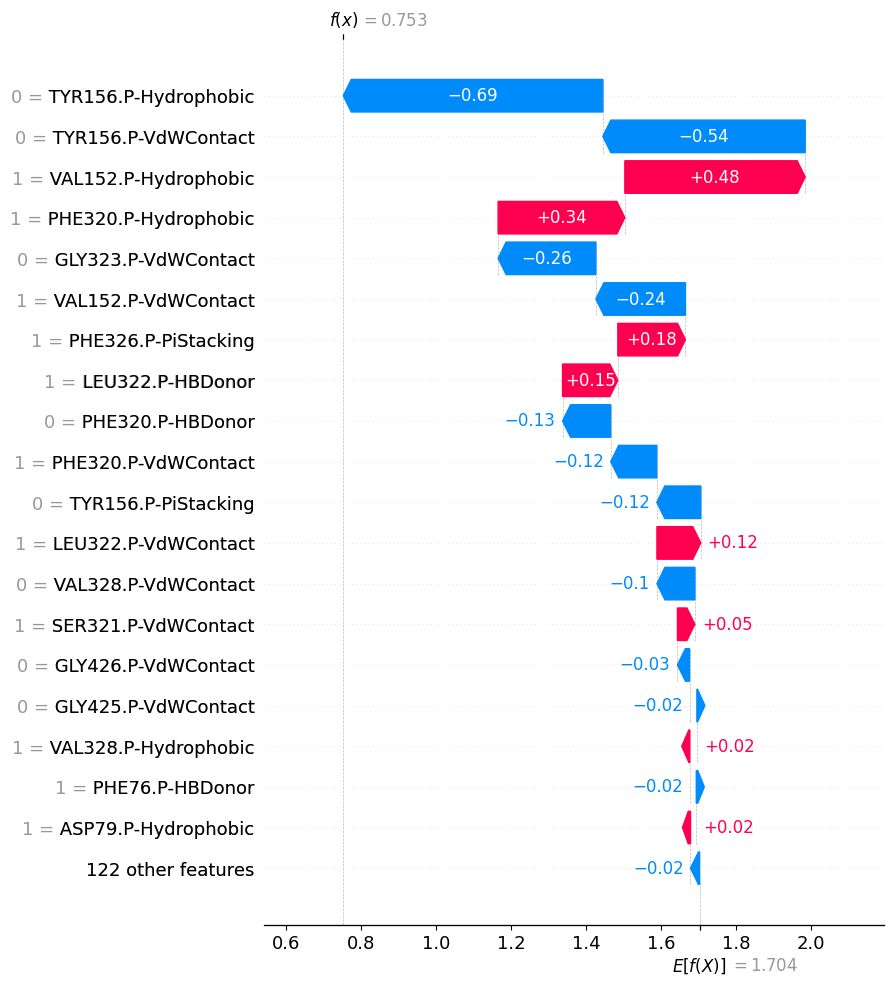

In [34]:
import shap
import torch
import numpy as np

# === Step 1: Select frame to explain ===
frame_index = 500  # Change to test other frames

# === Step 2: Prepare background and test sample ===
background = torch.tensor(X_test[:200]).unsqueeze(1).float().to(device)  # Use 200 samples as SHAP background
test_sample = torch.tensor(X_test[frame_index:frame_index+1]).unsqueeze(1).float().to(device)

# === Step 3: Build SHAP explainer ===
explainer = shap.DeepExplainer(model, background)

# === Step 4: Predict class and confidence ===
with torch.no_grad():
    output = model(test_sample)
    probs = torch.softmax(output, dim=1).cpu().numpy()[0]
    pred_class = np.argmax(probs)
    pred_label = y_labels[pred_class]
    confidence = probs[pred_class]

print(f"\n🧠 Prediction for Frame {frame_index}: {pred_label.upper()} (Confidence: {confidence:.2f})")

# === Step 5: Compute SHAP values for selected class ===
shap_values = explainer.shap_values(test_sample, check_additivity=False)
shap_vector = shap_values[0][0, :, pred_class]
base_value = explainer.expected_value[pred_class]

# === Step 6: Create SHAP Explanation object ===
explanation = shap.Explanation(
    values=shap_vector,
    base_values=base_value,
    data=X_test[frame_index],
    feature_names=[f"{res}-{inter}" for res, inter in feature_names]
)

# === Step 7: Plot waterfall chart ===
shap.plots.waterfall(explanation, max_display=20)  # Show top 20 features
